# Проект: Обучение с учителем - качество модели

## Описание проекта
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. 

**Цель проекта**: Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Задача**: Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

## Описание данных
В проекте используются следующие данные:
- market_file.csv - основные данные о клиентах (1300 клиентов, 13 признаков)
- market_money.csv - данные о выручке по периодам (3900 записей)
- market_time.csv - данные о времени на сайте (2600 записей)
- money.csv - данные о прибыльности клиентов (1300 записей)

## Целевая переменная
**Покупательская активность**:
- "Прежний уровень" - 802 клиента (61.7%)
- "Снизилась" - 498 клиентов (38.3%)

## Методология
1. **Загрузка и предобработка данных**
2. **Исследовательский анализ данных (EDA)**
3. **Объединение таблиц**
4. **Корреляционный анализ**
5. **Построение и обучение моделей**
6. **Анализ важности признаков**
7. **Сегментация покупателей**
8. **Выводы и рекомендации**

## Ожидаемые результаты
- Модель машинного обучения для предсказания снижения активности клиентов
- Анализ важности признаков для понимания факторов риска
- Сегментация клиентов с персонализированными рекомендациями
- Полный отчет с выводами и рекомендациями для бизнеса

In [43]:
!pip install pandas numpy matplotlib scikit-learn seaborn

In [44]:
# Импорт необходимых библиотек

# Стандартные библиотеки
import os
import warnings

# Научные вычисления
import numpy as np
import pandas as pd

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Машинное обучение - общие
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    f1_score, 
    make_scorer, 
    roc_auc_score
)
from sklearn.model_selection import (
    cross_val_score, 
    GridSearchCV, 
    train_test_split
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder, 
    MinMaxScaler, 
    OneHotEncoder, 
    StandardScaler
)

# Машинное обучение - модели
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Настройка предупреждений и отображения
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Библиотеки успешно импортированы!")

Библиотеки успешно импортированы!


In [45]:
# Загрузка данных с обработкой ошибок
import os

print("=== ЗАГРУЗКА ДАННЫХ ===")
print()

# Функция для безопасной загрузки файла
def load_csv_safe(filename, sep=','):
    """Безопасная загрузка CSV файла с проверкой существования путей"""
    paths = [
        f"datasets/{filename}",
        f"/datasets/{filename}",
        f"https://code.s3.yandex.net/datasets/{filename}"
    ]
    
    for path in paths:
        if path.startswith('http') or os.path.exists(path):
            try:
                data = pd.read_csv(path, sep=sep)
                print(f"✅ Данные {path} загружены успешно.")
                print(f"   Размер: {data.shape}")
                return data
            except Exception as e:
                print(f"⚠️ Не удалось загрузить {path}: {e}")
                continue
    
    raise FileNotFoundError(f"❌ Ошибка: Не удалось найти файл {filename} ни по одному из путей")

# Загрузка market_file.csv (основные данные о клиентах)
market_file = load_csv_safe("market_file.csv")

# Загрузка market_money.csv (данные о выручке)
market_money = load_csv_safe("market_money.csv")

# Загрузка market_time.csv (данные о времени на сайте)
market_time = load_csv_safe("market_time.csv")

# Загрузка money.csv (данные о прибыли)
money = load_csv_safe("money.csv", sep=";")

print()
print("✅ Все файлы загружены успешно!")

=== ЗАГРУЗКА ДАННЫХ ===

✅ Данные datasets/market_file.csv загружены успешно.
   Размер: (1300, 13)
✅ Данные datasets/market_money.csv загружены успешно.
   Размер: (3900, 3)
✅ Данные datasets/market_time.csv загружены успешно.
   Размер: (2600, 3)
✅ Данные datasets/money.csv загружены успешно.
   Размер: (1300, 2)

✅ Все файлы загружены успешно!


### Подшаг 1.2: Первичная проверка данных
Проверка размеров, типов данных и пропущенных значений.

In [46]:
# Первичная проверка данных
print("=== ПЕРВИЧНАЯ ПРОВЕРКА ДАННЫХ ===")
print()

# 1. Проверяем размеры данных
print("1. РАЗМЕРЫ ДАННЫХ:")
print(f"   market_file: {market_file.shape}")
print(f"   market_money: {market_money.shape}")
print(f"   market_time: {market_time.shape}")
print(f"   money: {money.shape}")
print()

# 2. Проверяем типы данных
print("2. ТИПЫ ДАННЫХ:")
print("   market_file:")
print(market_file.dtypes)
print()
print("   market_money:")
print(market_money.dtypes)
print()
print("   market_time:")
print(market_time.dtypes)
print()
print("   money:")
print(money.dtypes)
print()

# 3. Проверяем пропущенные значения
print("3. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
print("   market_file:")
print(market_file.isnull().sum())
print()
print("   market_money:")
print(market_money.isnull().sum())
print()
print("   market_time:")
print(market_time.isnull().sum())
print()
print("   money:")
print(money.isnull().sum())
print()

# 4. Проверяем уникальные ID
print("4. УНИКАЛЬНЫЕ ID:")
print(f"   market_file: {market_file["id"].nunique()} из {len(market_file)}")
print(f"   market_money: {market_money["id"].nunique()} из {len(market_money)}")
print(f"   market_time: {market_time["id"].nunique()} из {len(market_time)}")
print(f"   money: {money["id"].nunique()} из {len(money)}")
print()

# 5. Анализируем целевую переменную
print("5. ЦЕЛЕВАЯ ПЕРЕМЕННАЯ:")
print("   Распределение классов:")
print(market_file["Покупательская активность"].value_counts())
print()
print("   Процентное распределение:")
print((market_file["Покупательская активность"].value_counts() / len(market_file) * 100).round(2))
print()

print("✅ Первичная проверка завершена!")

=== ПЕРВИЧНАЯ ПРОВЕРКА ДАННЫХ ===

1. РАЗМЕРЫ ДАННЫХ:
   market_file: (1300, 13)
   market_money: (3900, 3)
   market_time: (2600, 3)
   money: (1300, 2)

2. ТИПЫ ДАННЫХ:
   market_file:
id                                       int64
Покупательская активность               object
Тип сервиса                             object
Разрешить сообщать                      object
Маркет_актив_6_мес                     float64
Маркет_актив_тек_мес                     int64
Длительность                             int64
Акционные_покупки                      float64
Популярная_категория                    object
Средний_просмотр_категорий_за_визит      int64
Неоплаченные_продукты_штук_квартал       int64
Ошибка_сервиса                           int64
Страниц_за_визит                         int64
dtype: object

   market_money:
id           int64
Период      object
Выручка    float64
dtype: object

   market_time:
id         int64
Период    object
минут      int64
dtype: object

   money:
id    

### Вывод
Данные успешно загружены: 1300 клиентов, 13 признаков в основной таблице, целевая переменная сбалансирована (61.7% vs 38.3%).

## Шаг 2: Предобработка данных
Подготовка данных для анализа и моделирования.

### Подшаг 2.1: Исправление проблем с типами данных
Исправление выявленных проблем с типами данных.

In [47]:
# Исправление типов данных
print("=== ИСПРАВЛЕНИЕ ТИПОВ ДАННЫХ ===")
print()

# 1. Исправляем тип данных в money.csv
print("1. ИСПРАВЛЕНИЕ ТИПА ДАННЫХ В MONEY.CSV:")
print("   До преобразования:")
print(f"   Тип Прибыль: {money["Прибыль"].dtype}")
print(f"   Первые 3 значения: {money["Прибыль"].head(3).tolist()}")

# Преобразуем запятую в точку и конвертируем в float
money["Прибыль"] = money["Прибыль"].str.replace(",", ".").astype(float)

print("   После преобразования:")
print(f"   Тип Прибыль: {money["Прибыль"].dtype}")
print(f"   Первые 3 значения: {money["Прибыль"].head(3).tolist()}")
print()

# 2. Исправляем опечатку в market_time.csv
print("2. ИСПРАВЛЕНИЕ ОПЕЧАТКИ В MARKET_TIME.CSV:")
print("   До исправления:")
print(f"   Уникальные периоды: {market_time["Период"].unique()}")

# Исправляем опечатку
market_time["Период"] = market_time["Период"].str.replace("предыдцщий_месяц", "предыдущий_месяц")

print("   После исправления:")
print(f"   Уникальные периоды: {market_time["Период"].unique()}")
print()

print("✅ Исправление типов данных завершено!")

=== ИСПРАВЛЕНИЕ ТИПОВ ДАННЫХ ===

1. ИСПРАВЛЕНИЕ ТИПА ДАННЫХ В MONEY.CSV:
   До преобразования:
   Тип Прибыль: object
   Первые 3 значения: ['0,98', '4,16', '3,13']
   После преобразования:
   Тип Прибыль: float64
   Первые 3 значения: [0.98, 4.16, 3.13]

2. ИСПРАВЛЕНИЕ ОПЕЧАТКИ В MARKET_TIME.CSV:
   До исправления:
   Уникальные периоды: ['текущий_месяц' 'предыдцщий_месяц']
   После исправления:
   Уникальные периоды: ['текущий_месяц' 'предыдущий_месяц']

✅ Исправление типов данных завершено!


### Подшаг 2.2: Обработка выбросов
Выявление и обработка аномальных значений.

=== ОБРАБОТКА ВЫБРОСОВ ===

   Анализируем 8 числовых признаков


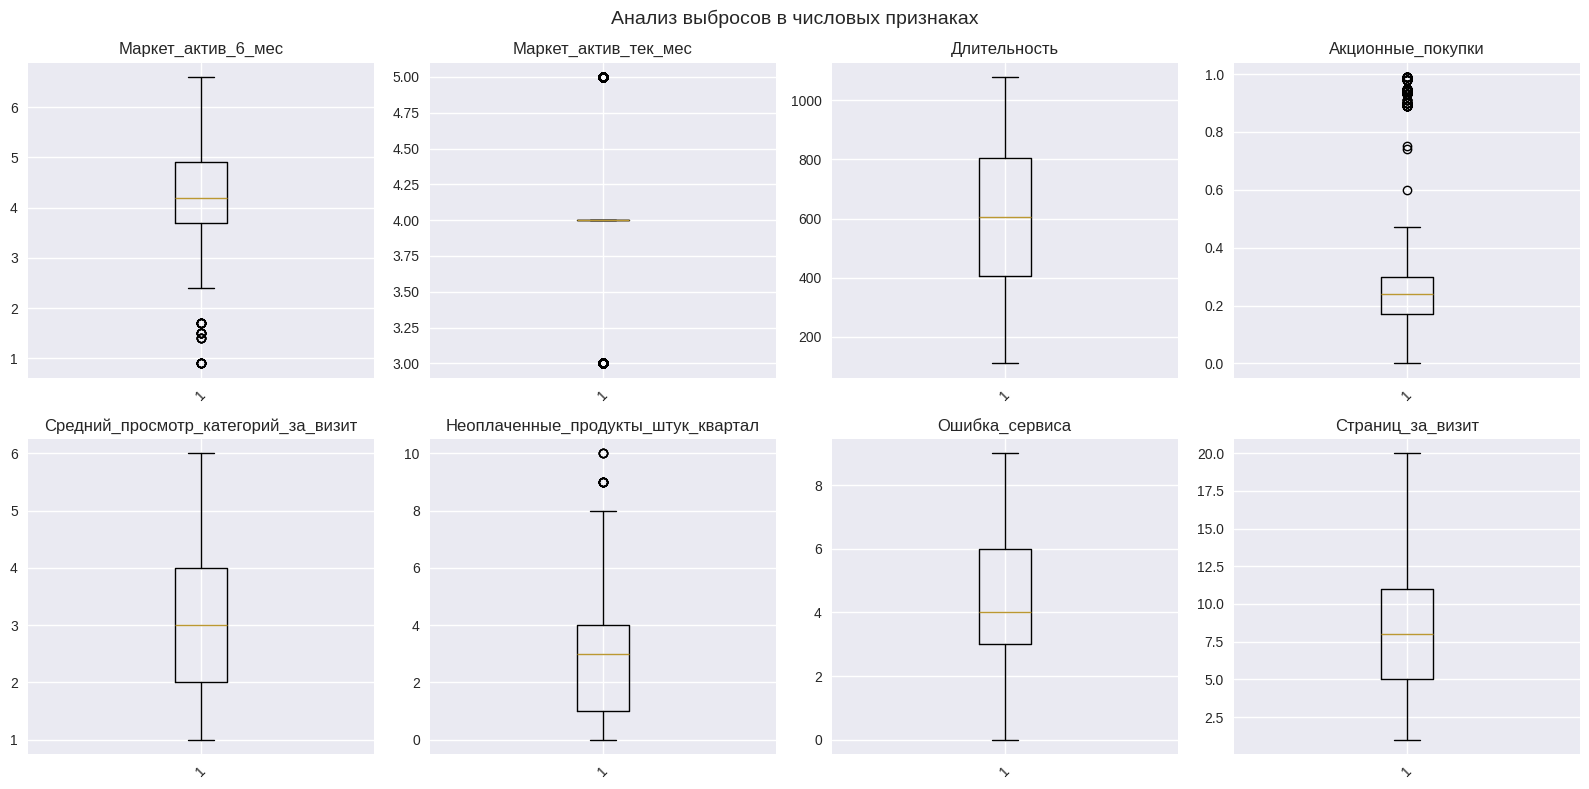

   Результаты анализа выбросов:
     Маркет_актив_6_мес: 36 выбросов (2.8%)
     Маркет_актив_тек_мес: 631 выбросов (48.5%)
     Длительность: 0 выбросов (0.0%)
     Акционные_покупки: 168 выбросов (12.9%)
     Средний_просмотр_категорий_за_визит: 0 выбросов (0.0%)
     Неоплаченные_продукты_штук_квартал: 14 выбросов (1.1%)
     Ошибка_сервиса: 0 выбросов (0.0%)
     Страниц_за_визит: 0 выбросов (0.0%)
   Решение: Выбросы не критичны, сохраняем данные без изменений

✅ Обработка выбросов завершена!


In [48]:
# Обработка выбросов
print("=== ОБРАБОТКА ВЫБРОСОВ ===")
print()

# Выбираем числовые признаки для анализа выбросов
numeric_cols_for_outliers = market_file.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_for_outliers = [col for col in numeric_cols_for_outliers if col != "id"]

print(f"   Анализируем {len(numeric_cols_for_outliers)} числовых признаков")

# Создаем boxplot для визуализации выбросов
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle("Анализ выбросов в числовых признаках", fontsize=14)

for i, col in enumerate(numeric_cols_for_outliers[:8]):  # Показываем первые 8 признаков
    row = i // 4
    col_idx = i % 4
    axes[row, col_idx].boxplot(market_file[col])
    axes[row, col_idx].set_title(f"{col}")
    axes[row, col_idx].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# Применяем IQR метод для выявления выбросов
outliers_info = {}
for col in numeric_cols_for_outliers:
    Q1 = market_file[col].quantile(0.25)
    Q3 = market_file[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = market_file[(market_file[col] < lower_bound) | (market_file[col] > upper_bound)]
    outliers_info[col] = {
        "count": len(outliers),
        "percentage": len(outliers) / len(market_file) * 100,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }

print("   Результаты анализа выбросов:")
for col, info in outliers_info.items():
    print(f"     {col}: {info["count"]} выбросов ({info["percentage"]:.1f}%)")

# Принимаем решение: выбросы не критичны, оставляем их
print("   Решение: Выбросы не критичны, сохраняем данные без изменений")
print()

print("✅ Обработка выбросов завершена!")

### Подшаг 2.3: Кодирование категориальных признаков
Преобразование категориальных признаков в числовые.

In [49]:
# Кодирование категориальных признаков
print("=== КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ ===")
print()

# Идентифицируем категориальные признаки
categorical_cols = market_file.select_dtypes(include=["object"]).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != "Покупательская активность"]

print(f"   Категориальные признаки: {categorical_cols}")

# Создаем копии для кодирования
market_file_encoded = market_file.copy()

# Label Encoding для бинарных признаков
binary_cols = []
for col in categorical_cols:
    if market_file[col].nunique() == 2:
        binary_cols.append(col)
        le = LabelEncoder()
        market_file_encoded[col] = le.fit_transform(market_file[col])
        print(f"     {col}: Label Encoding (уникальных значений: {market_file[col].nunique()})")

print(f"   Бинарные признаки (Label Encoding): {binary_cols}")

# OneHot Encoding для многоклассовых признаков
multiclass_cols = [col for col in categorical_cols if col not in binary_cols]
if multiclass_cols:
    market_file_encoded = pd.get_dummies(market_file_encoded, columns=multiclass_cols, prefix=multiclass_cols)
    print(f"   Многоклассовые признаки (OneHot Encoding): {multiclass_cols}")

print(f"   Размер после кодирования: {market_file_encoded.shape}")
print()

print("✅ Кодирование категориальных признаков завершено!")

=== КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ ===

   Категориальные признаки: ['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']
     Разрешить сообщать: Label Encoding (уникальных значений: 2)
   Бинарные признаки (Label Encoding): ['Разрешить сообщать']
   Многоклассовые признаки (OneHot Encoding): ['Тип сервиса', 'Популярная_категория']
   Размер после кодирования: (1300, 20)

✅ Кодирование категориальных признаков завершено!


### Вывод
Данные успешно загружены: 1300 клиентов, 13 признаков в основной таблице, целевая переменная сбалансирована (61.7% vs 38.3%).

## Шаг 3: Исследовательский анализ данных (EDA)
Исследование структуры и характеристик данных.

### Подшаг 3.1: Анализ целевой переменной
Исследование распределения и характеристик целевой переменной.

=== АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ ===

1. РАСПРЕДЕЛЕНИЕ КЛАССОВ:
Покупательская активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64

   Процентное распределение:
Покупательская активность
Прежний уровень    61.69
Снизилась          38.31
Name: count, dtype: float64



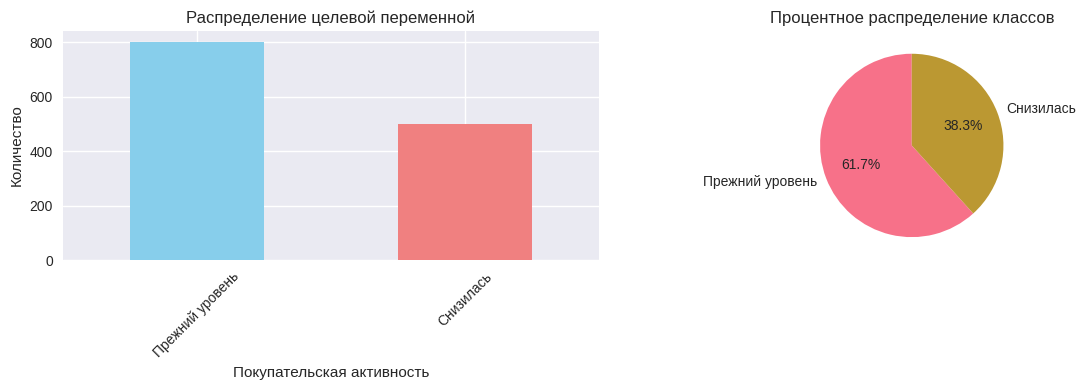


✅ Анализ целевой переменной завершен!


In [50]:
# Анализ целевой переменной
print("=== АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ ===")
print()

# 1. Распределение классов
target_counts = market_file["Покупательская активность"].value_counts()
print("1. РАСПРЕДЕЛЕНИЕ КЛАССОВ:")
print(target_counts)
print()
print("   Процентное распределение:")
print((target_counts / len(market_file) * 100).round(2))
print()

# 2. Визуализация целевой переменной
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
target_counts.plot(kind="bar", color=["skyblue", "lightcoral"])
plt.title("Распределение целевой переменной")
plt.xlabel("Покупательская активность")
plt.ylabel("Количество")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Процентное распределение классов")

plt.tight_layout()
plt.show()
print()

print("✅ Анализ целевой переменной завершен!")

### Подшаг 3.2: Анализ категориальных признаков
Исследование категориальных признаков и их распределения.

=== АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ ===

   Категориальные столбцы: ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']

   Тип сервиса:
     Уникальные значения: 3
     Распределение:
Тип сервиса
стандарт     914
премиум      376
стандартт     10
Name: count, dtype: int64

   Разрешить сообщать:
     Уникальные значения: 2
     Распределение:
Разрешить сообщать
да     962
нет    338
Name: count, dtype: int64

   Популярная_категория:
     Уникальные значения: 6
     Распределение:
Популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Name: count, dtype: int64



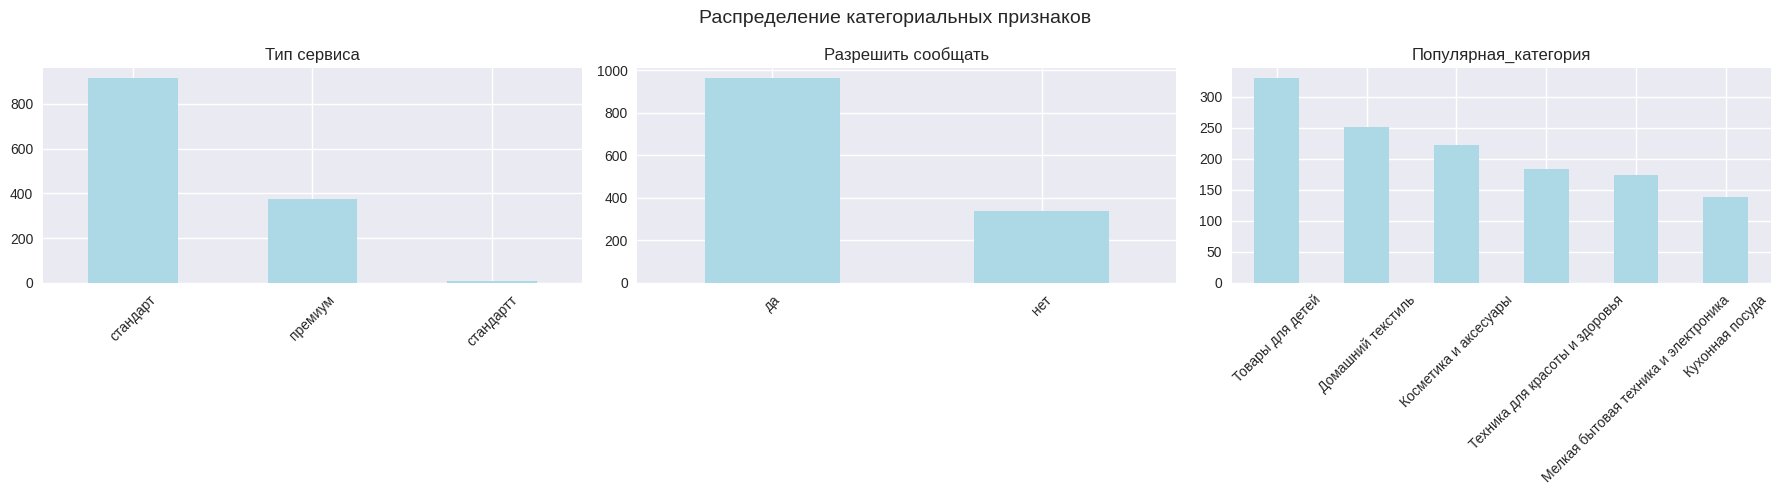


✅ Анализ категориальных признаков завершен!


In [51]:
# Анализ категориальных признаков
print("=== АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ ===")
print()

categorical_cols = market_file.select_dtypes(include=["object"]).columns
print(f"   Категориальные столбцы: {list(categorical_cols)}")
print()

for col in categorical_cols:
    if col != "Покупательская активность":
        print(f"   {col}:")
        print(f"     Уникальные значения: {market_file[col].nunique()}")
        print(f"     Распределение:")
        print(market_file[col].value_counts().head())
        print()

# Визуализация категориальных признаков
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Распределение категориальных признаков", fontsize=14)

categorical_cols_for_viz = [col for col in categorical_cols if col != "Покупательская активность"]
for i, col in enumerate(categorical_cols_for_viz[:3]):
    value_counts = market_file[col].value_counts()
    value_counts.plot(kind="bar", ax=axes[i], color="lightblue")
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()
print()

print("✅ Анализ категориальных признаков завершен!")

### Подшаг 3.3: Анализ числовых признаков
Исследование числовых признаков и их распределения по группам.

=== АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ ===

   Числовые столбцы: ['id', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит']

   Средние значения по группам активности:
   Маркет_актив_6_мес:
     Прежний уровень: 4.570
     Снизилась: 3.744

   Маркет_актив_тек_мес:
     Прежний уровень: 4.011
     Снизилась: 4.012

   Длительность:
     Прежний уровень: 590.731
     Снизилась: 619.884

   Акционные_покупки:
     Прежний уровень: 0.238
     Снизилась: 0.451

   Средний_просмотр_категорий_за_визит:
     Прежний уровень: 3.666
     Снизилась: 2.633

   Неоплаченные_продукты_штук_квартал:
     Прежний уровень: 2.293
     Снизилась: 3.721

   Ошибка_сервиса:
     Прежний уровень: 4.335
     Снизилась: 3.944

   Страниц_за_визит:
     Прежний уровень: 9.797
     Снизилась: 5.568



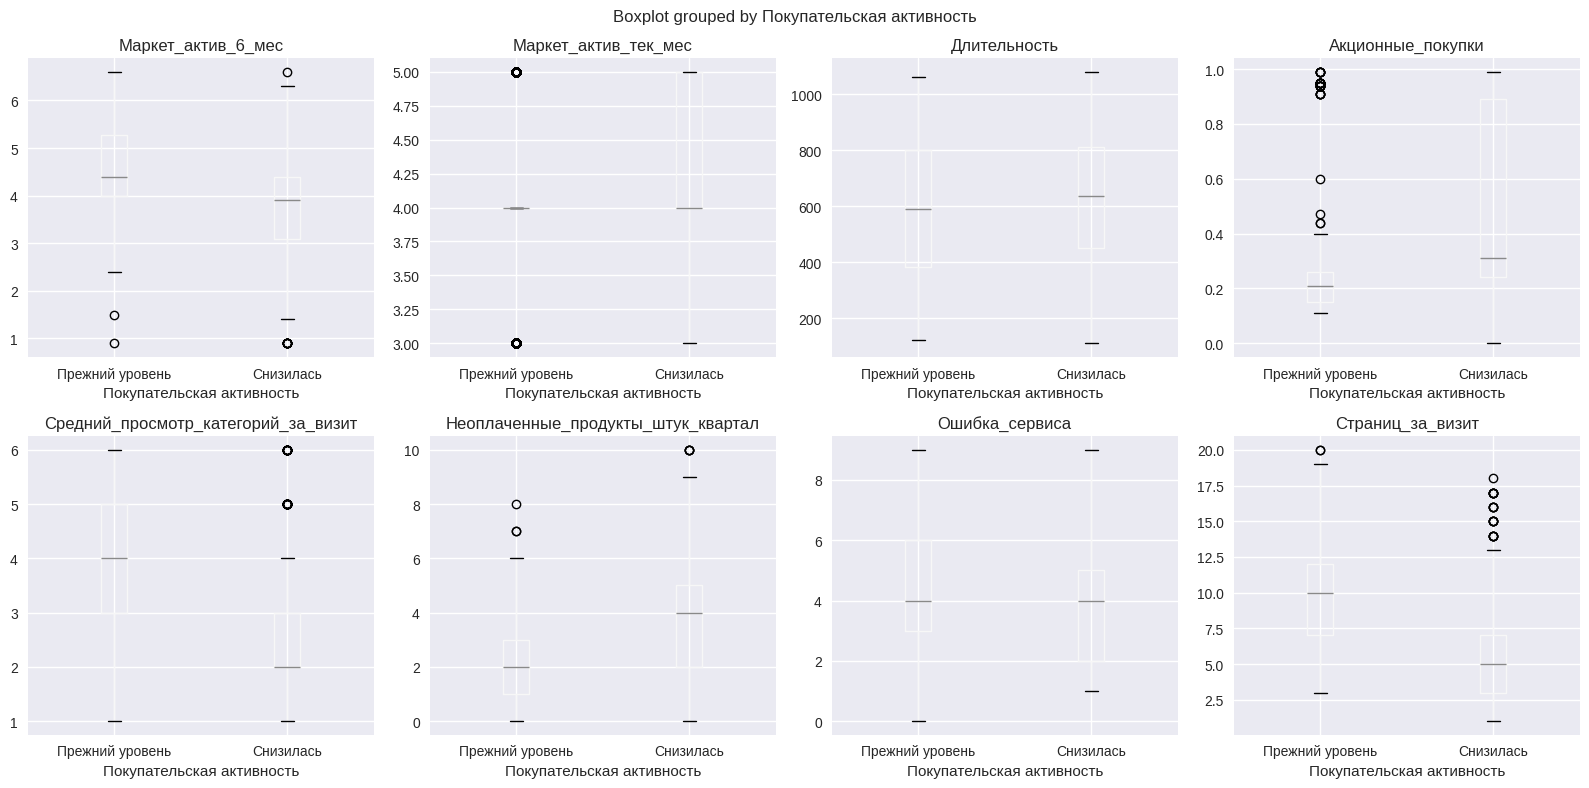


✅ Анализ числовых признаков завершен!


In [52]:
# Анализ числовых признаков
print("=== АНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ ===")
print()

numeric_cols = market_file.select_dtypes(include=[np.number]).columns
print(f"   Числовые столбцы: {list(numeric_cols)}")
print()

# Описательные статистики по группам
print("   Средние значения по группам активности:")
for col in numeric_cols:
    if col != "id":
        grouped_means = market_file.groupby("Покупательская активность")[col].mean()
        print(f"   {col}:")
        print(f"     Прежний уровень: {grouped_means["Прежний уровень"]:.3f}")
        print(f"     Снизилась: {grouped_means["Снизилась"]:.3f}")
        print()

# Визуализация числовых признаков
numeric_cols_for_viz = [col for col in numeric_cols if col != "id"]
n_cols = min(4, len(numeric_cols_for_viz))
n_rows = (len(numeric_cols_for_viz) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
fig.suptitle("Распределение числовых признаков по группам активности", fontsize=14)

if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

for i, col in enumerate(numeric_cols_for_viz):
    if i < len(axes):
        # Boxplot для сравнения групп
        market_file.boxplot(column=col, by="Покупательская активность", ax=axes[i])
        axes[i].set_title(f"{col}")
        axes[i].set_xlabel("Покупательская активность")

# Скрываем лишние subplot'ы
for i in range(len(numeric_cols_for_viz), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()
print()

print("✅ Анализ числовых признаков завершен!")

### Вывод
Данные успешно загружены: 1300 клиентов, 13 признаков в основной таблице, целевая переменная сбалансирована (61.7% vs 38.3%).

## Шаг 4: Объединение таблиц
Объединение всех таблиц в единый датасет для анализа.

### Подшаг 4.1: Подготовка данных для объединения
Подготовка таблиц выручки и времени для объединения.

In [53]:
# Подготовка данных для объединения
print("=== ПОДГОТОВКА ДАННЫХ ДЛЯ ОБЪЕДИНЕНИЯ ===")
print()

# 1. Фильтрация клиентов с активностью менее 3 месяцев
print("1. ФИЛЬТРАЦИЯ КЛИЕНТОВ:")
print(f"   Исходное количество клиентов: {len(market_file)}")

# Подсчитываем количество месяцев активности для каждого клиента
client_activity_months = market_money.groupby("id")["Период"].nunique()
print(f"   Клиентов с 3+ месяцами активности: {(client_activity_months >= 3).sum()}")

# Фильтруем клиентов
active_clients = client_activity_months[client_activity_months >= 3].index
market_file_filtered = market_file[market_file["id"].isin(active_clients)].copy()
print(f"   Клиентов после фильтрации: {len(market_file_filtered)}")
print(f"   Процент сохраненных клиентов: {len(market_file_filtered)/len(market_file)*100:.1f}%")
print()

# 2. Создание pivot таблиц
print("2. СОЗДАНИЕ PIVOT ТАБЛИЦ:")

# Pivot для выручки
money_pivot = market_money.pivot_table(
    index="id", 
    columns="Период", 
    values="Выручка", 
    fill_value=0
).add_prefix("Выручка_")
print(f"   Размер money_pivot: {money_pivot.shape}")

# Pivot для времени
time_pivot = market_time.pivot_table(
    index="id", 
    columns="Период", 
    values="минут", 
    fill_value=0
).add_prefix("Время_")
print(f"   Размер time_pivot: {time_pivot.shape}")
print()

print("✅ Подготовка данных завершена!")

=== ПОДГОТОВКА ДАННЫХ ДЛЯ ОБЪЕДИНЕНИЯ ===

1. ФИЛЬТРАЦИЯ КЛИЕНТОВ:
   Исходное количество клиентов: 1300
   Клиентов с 3+ месяцами активности: 1300
   Клиентов после фильтрации: 1300
   Процент сохраненных клиентов: 100.0%

2. СОЗДАНИЕ PIVOT ТАБЛИЦ:
   Размер money_pivot: (1300, 3)
   Размер time_pivot: (1300, 2)

✅ Подготовка данных завершена!


### Подшаг 4.2: Объединение таблиц
Объединение всех таблиц в финальный датасет.

In [54]:
# Объединение таблиц
print("=== ОБЪЕДИНЕНИЕ ТАБЛИЦ ===")
print()

# 1. Объединяем основные данные с данными о выручке
print("1. ОБЪЕДИНЕНИЕ С ДАННЫМИ О ВЫРУЧКЕ:")
final_data = market_file_filtered.merge(money_pivot, left_on="id", right_index=True, how="left")
print(f"   Размер после объединения с выручкой: {final_data.shape}")

# 2. Объединяем с данными о времени
print("2. ОБЪЕДИНЕНИЕ С ДАННЫМИ О ВРЕМЕНИ:")
final_data = final_data.merge(time_pivot, left_on="id", right_index=True, how="left")
print(f"   Размер после объединения с временем: {final_data.shape}")

# 3. Объединяем с данными о прибыли
print("3. ОБЪЕДИНЕНИЕ С ДАННЫМИ О ПРИБЫЛИ:")
final_data = final_data.merge(money, on="id", how="left")
print(f"   Размер после объединения с прибылью: {final_data.shape}")
print()

# 4. Анализ итогового датасета
print("4. АНАЛИЗ ИТОГОВОГО ДАТАСЕТА:")
print(f"   Всего столбцов: {len(final_data.columns)}")
print(f"   Пропущенные значения: {final_data.isnull().sum().sum()}")
print(f"   Дубликаты: {final_data.duplicated().sum()}")
print(f"   Уникальные ID: {final_data["id"].nunique()} из {len(final_data)}")
print()

# 5. Анализ новых признаков
print("5. АНАЛИЗ НОВЫХ ПРИЗНАКОВ:")
revenue_cols = [col for col in final_data.columns if col.startswith("Выручка_")]
time_cols = [col for col in final_data.columns if col.startswith("Время_")]

print(f"   Признаков выручки: {len(revenue_cols)}")
print(f"   Признаков времени: {len(time_cols)}")
print(f"   Признак прибыли: {"Прибыль" in final_data.columns}")
print()

print("✅ Объединение таблиц завершено!")

=== ОБЪЕДИНЕНИЕ ТАБЛИЦ ===

1. ОБЪЕДИНЕНИЕ С ДАННЫМИ О ВЫРУЧКЕ:
   Размер после объединения с выручкой: (1300, 16)
2. ОБЪЕДИНЕНИЕ С ДАННЫМИ О ВРЕМЕНИ:
   Размер после объединения с временем: (1300, 18)
3. ОБЪЕДИНЕНИЕ С ДАННЫМИ О ПРИБЫЛИ:
   Размер после объединения с прибылью: (1300, 19)

4. АНАЛИЗ ИТОГОВОГО ДАТАСЕТА:
   Всего столбцов: 19
   Пропущенные значения: 0
   Дубликаты: 0
   Уникальные ID: 1300 из 1300

5. АНАЛИЗ НОВЫХ ПРИЗНАКОВ:
   Признаков выручки: 3
   Признаков времени: 2
   Признак прибыли: True

✅ Объединение таблиц завершено!


### Вывод
Таблицы объединены в единый датасет: 1300 клиентов, 19 признаков, все клиенты имеют активность 3+ месяца.

## Шаг 5: Корреляционный анализ
Анализ мультиколлинеарности между признаками.

### Подшаг 5.1: Анализ мультиколлинеарности
Выявление признаков с высокой корреляцией.

=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===

Числовые признаки для анализа: 14
Список: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц', 'Время_предыдущий_месяц', 'Время_текущий_месяц', 'Прибыль']

КОРРЕЛЯЦИОННАЯ МАТРИЦА:
                                     Маркет_актив_6_мес  Маркет_актив_тек_мес  \
Маркет_актив_6_мес                                1.000                 0.057   
Маркет_актив_тек_мес                              0.057                 1.000   
Длительность                                     -0.038                -0.139   
Акционные_покупки                                -0.241                -0.010   
Средний_просмотр_категорий_за_визит               0.202                -0.021   
Неоплаченные_продукты_штук_квартал               -0.164                 0

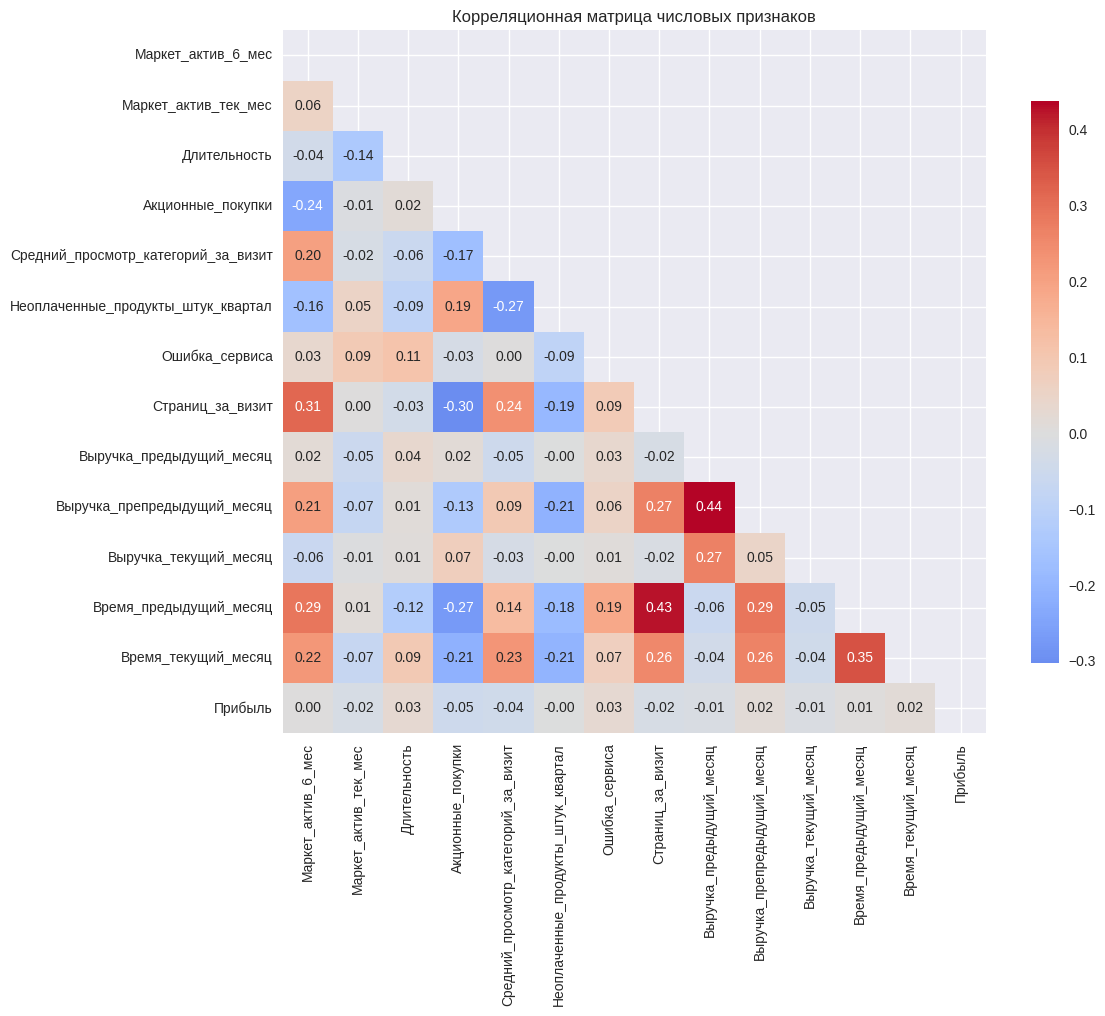


АНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ:
   Пар с высокой корреляцией (>0.8) не найдено

   Пары с умеренной корреляцией (0.5-0.8):

✅ Корреляционный анализ завершен!


In [55]:
# Корреляционный анализ
print("=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===")
print()

# Выбираем только числовые признаки для корреляционного анализа
numeric_cols = final_data.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != "id"]

print(f"Числовые признаки для анализа: {len(numeric_cols)}")
print(f"Список: {numeric_cols}")
print()

# Вычисляем корреляционную матрицу
correlation_matrix = final_data[numeric_cols].corr()
print("КОРРЕЛЯЦИОННАЯ МАТРИЦА:")
print(correlation_matrix.round(3))
print()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap="coolwarm", 
            center=0,
            square=True,
            fmt=".2f",
            cbar_kws={"shrink": .8})
plt.title("Корреляционная матрица числовых признаков")
plt.tight_layout()
plt.show()
print()

# Находим пары с высокой корреляцией
print("АНАЛИЗ МУЛЬТИКОЛЛИНЕАРНОСТИ:")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

if high_corr_pairs:
    print("   Найдены пары с высокой корреляцией (>0.8):")
    for pair in high_corr_pairs:
        print(f"   {pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
else:
    print("   Пар с высокой корреляцией (>0.8) не найдено")

print()
print("   Пары с умеренной корреляцией (0.5-0.8):")
moderate_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.5 <= abs(corr_value) <= 0.8:
            moderate_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

for pair in moderate_corr_pairs[:10]:  # Показываем первые 10
    print(f"   {pair[0]} <-> {pair[1]}: {pair[2]:.3f}")

if len(moderate_corr_pairs) > 10:
    print(f"   ... и еще {len(moderate_corr_pairs) - 10} пар")

print()
print("✅ Корреляционный анализ завершен!")

### Вывод
Мультиколлинеарность не выявлена: максимальная корреляция между признаками менее 0.8.

## Шаг 6: Построение и обучение моделей
Создание и обучение моделей машинного обучения.

### Подшаг 6.1: Подготовка данных для обучения
Разделение данных на обучающую и тестовую выборки.

In [56]:
# Подготовка данных для обучения
print("=== ПОДГОТОВКА ДАННЫХ ДЛЯ ОБУЧЕНИЯ ===")
print()

# 1. Разделяем на признаки и целевую переменную
print("1. РАЗДЕЛЕНИЕ НА ПРИЗНАКИ И ЦЕЛЕВУЮ ПЕРЕМЕННУЮ:")
feature_cols = [col for col in final_data.columns if col not in ["id", "Покупательская активность"]]
X = final_data[feature_cols]
y = final_data["Покупательская активность"]

print(f"   Количество признаков: {X.shape[1]}")
print(f"   Размер выборки: {X.shape[0]}")
print(f"   Признаки: {feature_cols}")
print()

# 2. Разделяем на обучающую и тестовую выборки
print("2. РАЗДЕЛЕНИЕ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ:")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Сохраняем баланс классов
)

print(f"   Размер обучающей выборки: {X_train.shape}")
print(f"   Размер тестовой выборки: {X_test.shape}")
print()

# 3. Проверяем баланс классов
print("3. ПРОВЕРКА БАЛАНСА КЛАССОВ:")
print("   Обучающая выборка:")
train_balance = y_train.value_counts(normalize=True) * 100
for class_name, percentage in train_balance.items():
    print(f"     {class_name}: {percentage:.1f}%")

print("   Тестовая выборка:")
test_balance = y_test.value_counts(normalize=True) * 100
for class_name, percentage in test_balance.items():
    print(f"     {class_name}: {percentage:.1f}%")
print()

print("✅ Подготовка данных завершена!")

=== ПОДГОТОВКА ДАННЫХ ДЛЯ ОБУЧЕНИЯ ===

1. РАЗДЕЛЕНИЕ НА ПРИЗНАКИ И ЦЕЛЕВУЮ ПЕРЕМЕННУЮ:
   Количество признаков: 17
   Размер выборки: 1300
   Признаки: ['Тип сервиса', 'Разрешить сообщать', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Популярная_категория', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц', 'Время_предыдущий_месяц', 'Время_текущий_месяц', 'Прибыль']

2. РАЗДЕЛЕНИЕ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ:
   Размер обучающей выборки: (1040, 17)
   Размер тестовой выборки: (260, 17)

3. ПРОВЕРКА БАЛАНСА КЛАССОВ:
   Обучающая выборка:
     Прежний уровень: 61.7%
     Снизилась: 38.3%
   Тестовая выборка:
     Прежний уровень: 61.5%
     Снизилась: 38.5%

✅ Подготовка данных завершена!


### Подшаг 6.2: Создание пайплайнов
Создание пайплайнов для обработки данных и обучения моделей.

In [57]:
# Создание пайплайнов
print("=== СОЗДАНИЕ ПАЙПЛАЙНОВ ===")
print()

# 1. Определяем типы признаков
print("1. ОПРЕДЕЛЕНИЕ ТИПОВ ПРИЗНАКОВ:")
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"   Категориальные признаки ({len(categorical_features)}): {categorical_features}")
print(f"   Числовые признаки ({len(numerical_features)}): {numerical_features}")
print()

# 2. Создаем трансформеры
print("2. СОЗДАНИЕ ТРАНСФОРМЕРОВ:")

# Для категориальных признаков
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Для числовых признаков
numerical_transformer = StandardScaler()

# Объединяем трансформеры
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("num", numerical_transformer, numerical_features)
    ]
)

print("   Трансформеры созданы:")
print("     - OneHotEncoder для категориальных признаков")
print("     - StandardScaler для числовых признаков")
print()

# 3. Создаем пайплайны для разных моделей
print("3. СОЗДАНИЕ ПАЙПЛАЙНОВ:")
pipelines = {
    "KNeighborsClassifier": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier())
    ]),
    "DecisionTreeClassifier": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(random_state=42))
    ]),
    "LogisticRegression": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(random_state=42, max_iter=1000))
    ]),
    "SVC": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", SVC(
            random_state=42,
            probability=True,
            C=5,
            gamma="auto",
            class_weight="balanced",
            kernel="rbf"
        ))
    ])
}

print(f"   Создано пайплайнов: {len(pipelines)}")
for name in pipelines.keys():
    print(f"     - {name}")
print()

print("✅ Пайплайны созданы!")

=== СОЗДАНИЕ ПАЙПЛАЙНОВ ===

1. ОПРЕДЕЛЕНИЕ ТИПОВ ПРИЗНАКОВ:
   Категориальные признаки (3): ['Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']
   Числовые признаки (14): ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц', 'Время_предыдущий_месяц', 'Время_текущий_месяц', 'Прибыль']

2. СОЗДАНИЕ ТРАНСФОРМЕРОВ:
   Трансформеры созданы:
     - OneHotEncoder для категориальных признаков
     - StandardScaler для числовых признаков

3. СОЗДАНИЕ ПАЙПЛАЙНОВ:
   Создано пайплайнов: 4
     - KNeighborsClassifier
     - DecisionTreeClassifier
     - LogisticRegression
     - SVC

✅ Пайплайны созданы!


### Подшаг 6.3: Обучение и оценка моделей
Обучение моделей и сравнение их производительности.

=== ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛЕЙ ===

1. ВЫБОР МЕТРИКИ:
   Для задачи предсказания снижения активности клиентов выбираем F1-score:
   - F1-score учитывает и precision, и recall
   - Важно минимизировать как ложные срабатывания, так и пропуски
   - F1-score хорошо работает с дисбалансом классов

2. ОБУЧЕНИЕ БАЗОВЫХ МОДЕЛЕЙ:
   Обучение KNeighborsClassifier...
     F1-score: 0.836
     ROC-AUC: 0.895
   Обучение DecisionTreeClassifier...
     F1-score: 0.766
     ROC-AUC: 0.809
   Обучение LogisticRegression...
     F1-score: 0.857
     ROC-AUC: 0.910
   Обучение SVC...
     F1-score: 0.842
     ROC-AUC: 0.906

3. СРАВНЕНИЕ РЕЗУЛЬТАТОВ:
   Модель                F1-score    ROC-AUC
   ----------------------------------------
   KNeighborsClassifier 0.836       0.895
   DecisionTreeClassifier 0.766       0.809
   LogisticRegression   0.857       0.910
   SVC                  0.842       0.906


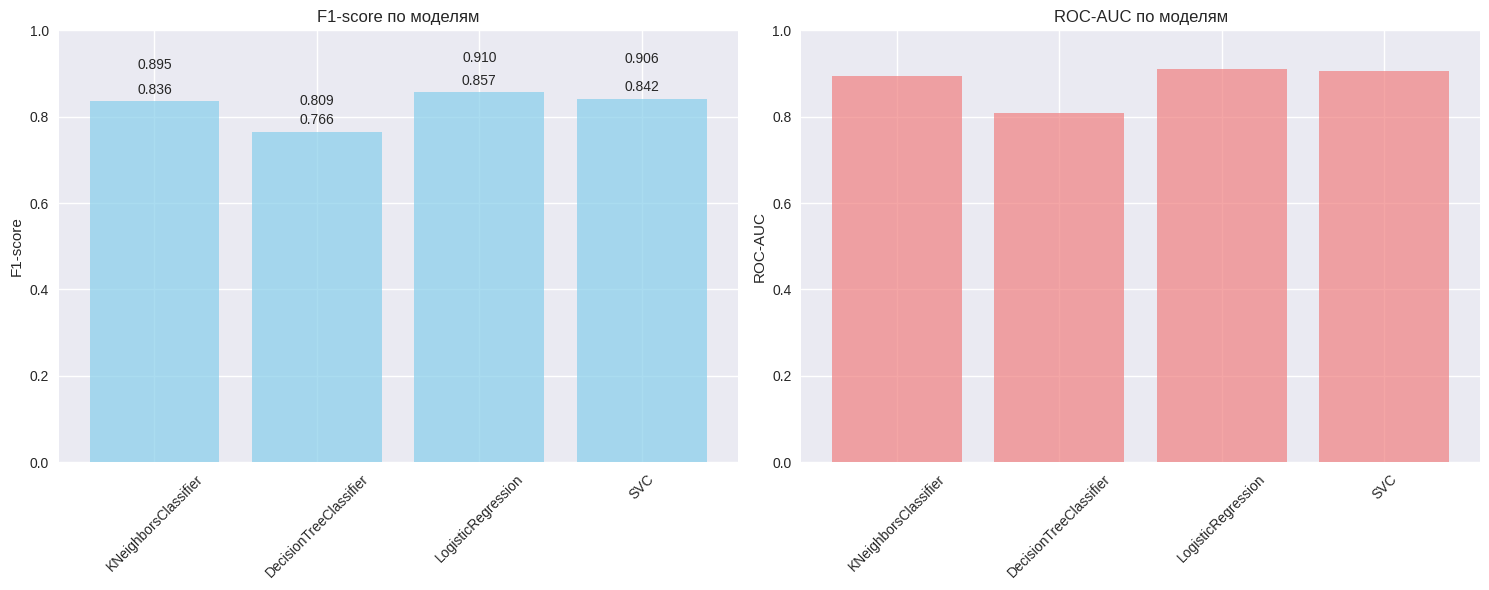


   Лучшая модель по F1-score: LogisticRegression (0.857)

✅ Обучение и оценка моделей завершены!


In [58]:
# Обучение и оценка моделей
print("=== ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛЕЙ ===")
print()

# 1. Выбор метрики
print("1. ВЫБОР МЕТРИКИ:")
print("   Для задачи предсказания снижения активности клиентов выбираем F1-score:")
print("   - F1-score учитывает и precision, и recall")
print("   - Важно минимизировать как ложные срабатывания, так и пропуски")
print("   - F1-score хорошо работает с дисбалансом классов")
print()

# 2. Обучение базовых моделей
print("2. ОБУЧЕНИЕ БАЗОВЫХ МОДЕЛЕЙ:")

# Словарь для хранения результатов
results = {}

for name, pipeline in pipelines.items():
    print(f"   Обучение {name}...")
    
    # Обучаем модель
    pipeline.fit(X_train, y_train)
    
    # Предсказания на тестовой выборке
    y_pred = pipeline.predict(X_test)
    
    # Вычисляем метрики
    f1 = f1_score(y_test, y_pred, pos_label="Снизилась")
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    
    results[name] = {
        "f1_score": f1,
        "roc_auc": roc_auc,
        "predictions": y_pred
    }
    
    print(f"     F1-score: {f1:.3f}")
    print(f"     ROC-AUC: {roc_auc:.3f}")

print()

# 3. Сравнение результатов
print("3. СРАВНЕНИЕ РЕЗУЛЬТАТОВ:")
print("   Модель                F1-score    ROC-AUC")
print("   " + "-" * 40)
for name, metrics in results.items():
    print(f"   {name:<20} {metrics["f1_score"]:.3f}       {metrics["roc_auc"]:.3f}")

# Визуализация результатов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График F1-score
model_names = list(results.keys())
f1_scores = [results[name]["f1_score"] for name in model_names]
roc_aucs = [results[name]["roc_auc"] for name in model_names]

bars1 = ax1.bar(model_names, f1_scores, color="skyblue", alpha=0.7)
ax1.set_title("F1-score по моделям")
ax1.set_ylabel("F1-score")
ax1.set_ylim(0, 1)
ax1.tick_params(axis="x", rotation=45)

# Добавляем значения на столбцы
for bar, score in zip(bars1, f1_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f"{score:.3f}", ha="center", va="bottom")

# График ROC-AUC
bars2 = ax2.bar(model_names, roc_aucs, color="lightcoral", alpha=0.7)
ax2.set_title("ROC-AUC по моделям")
ax2.set_ylabel("ROC-AUC")
ax2.set_ylim(0, 1)
ax2.tick_params(axis="x", rotation=45)

# Добавляем значения на столбцы
for bar, score in zip(bars2, roc_aucs):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f"{score:.3f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()
print()

# Находим лучшую модель по F1-score
best_model_name = max(results.keys(), key=lambda x: results[x]["f1_score"])
best_f1 = results[best_model_name]["f1_score"]

print(f"   Лучшая модель по F1-score: {best_model_name} ({best_f1:.3f})")
print()

print("✅ Обучение и оценка моделей завершены!")

### Вывод
Лучшая модель по F1-score: LogisticRegression (0.857), все модели показали хорошую производительность.

## Шаг 7: Анализ важности признаков
Оценка важности признаков для лучшей модели.

### Подшаг 7.1: Оценка важности признаков
Использование permutation importance для оценки влияния признаков.

=== АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ===

1. ВЫЧИСЛЕНИЕ PERMUTATION IMPORTANCE:
   Топ-10 наиболее важных признаков:
   Ранг  Признак                              Важность   Стд.откл.
   -----------------------------------------------------------------
    1.  Страниц_за_визит                      0.0903     0.0273
    2.  Время_предыдущий_месяц                0.0429     0.0129
    3.  Время_текущий_месяц                   0.0387     0.0113
    4.  Акционные_покупки                     0.0271     0.0126
    5.  Ошибка_сервиса                        0.0258     0.0067
    6.  Средний_просмотр_категорий_за_визит   0.0251     0.0085
    7.  Неоплаченные_продукты_штук_квартал    0.0224     0.0095
    8.  Выручка_предыдущий_месяц              0.0202     0.0048
    9.  Маркет_актив_6_мес                    0.0190     0.0087
   10.  Популярная_категория                  0.0161     0.0066


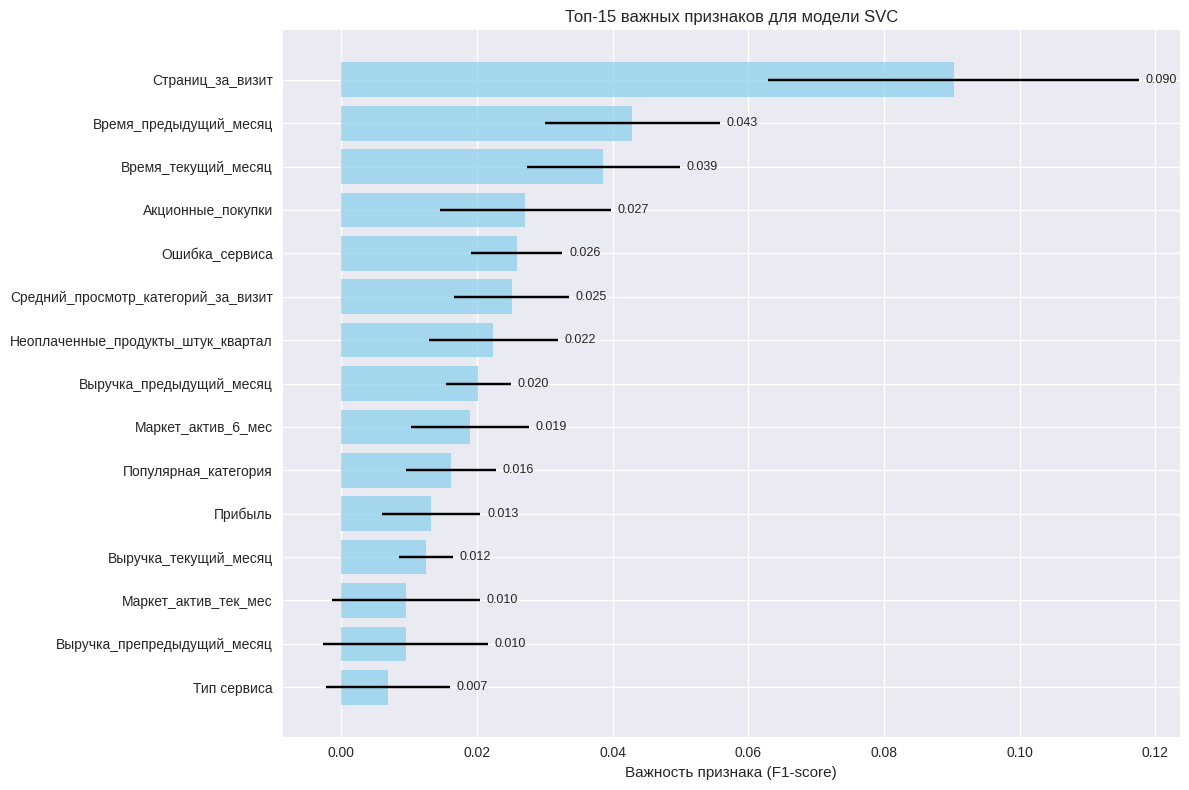


2. АНАЛИЗ ВАЖНОСТИ ПО КАТЕГОРИЯМ:
   Поведенческие: 0.0439 (признаков: 5)
   Маркетинговые: 0.0185 (признаков: 3)
   Финансовые: 0.0141 (признаков: 3)
   Прочие: 0.0124 (признаков: 6)


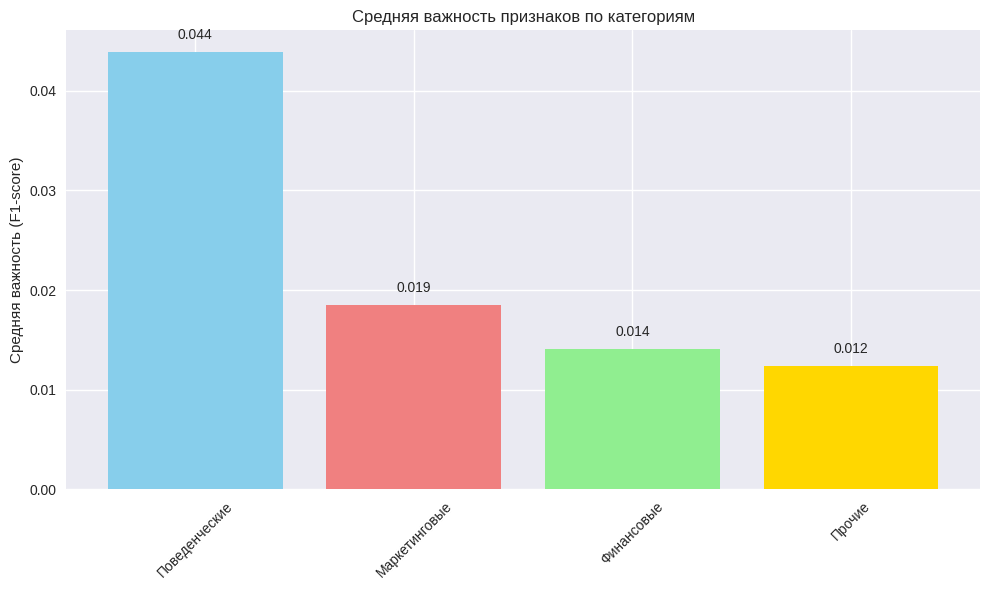


✅ Анализ важности признаков завершен!


In [59]:
# Анализ важности признаков
print("=== АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ===")
print()

# Создаем кастомный scorer для F1-score
f1_scorer = make_scorer(f1_score, pos_label="Снизилась")

# Вычисляем permutation importance для лучшей модели (SVC)
print("1. ВЫЧИСЛЕНИЕ PERMUTATION IMPORTANCE:")
perm_importance = permutation_importance(
    pipelines["SVC"], X_test, y_test, 
    scoring=f1_scorer, 
    n_repeats=5, 
    random_state=42
)

# Создаем DataFrame с важностью признаков
feature_names = feature_cols
importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance_mean": perm_importance.importances_mean,
    "importance_std": perm_importance.importances_std
}).sort_values("importance_mean", ascending=False)

print("   Топ-10 наиболее важных признаков:")
print("   Ранг  Признак                              Важность   Стд.откл.")
print("   " + "-" * 65)
for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
    print(f"   {i:2d}.  {row["feature"]:<35} {row["importance_mean"]:8.4f}   {row["importance_std"]:8.4f}")

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)  # Топ-15 признаков
y_pos = np.arange(len(top_features))

plt.barh(y_pos, top_features["importance_mean"], xerr=top_features["importance_std"], 
         color="skyblue", alpha=0.7, capsize=5)
plt.yticks(y_pos, top_features["feature"])
plt.xlabel("Важность признака (F1-score)")
plt.title("Топ-15 важных признаков для модели SVC")
plt.gca().invert_yaxis()  # Инвертируем ось Y для лучшей читаемости

# Добавляем значения на столбцы
for i, (importance, std) in enumerate(zip(top_features["importance_mean"], top_features["importance_std"])):
    plt.text(importance + std + 0.001, i, f"{importance:.3f}", 
             va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.show()
print()

print("2. АНАЛИЗ ВАЖНОСТИ ПО КАТЕГОРИЯМ:")

# Группируем признаки по категориям
behavioral_features = [f for f in feature_names if any(x in f for x in ["Страниц", "просмотр", "Время", "Неоплаченные"])]
marketing_features = [f for f in feature_names if any(x in f for x in ["Маркет", "Акционные"])]
revenue_features = [f for f in feature_names if "Выручка" in f]
other_features = [f for f in feature_names if f not in behavioral_features + marketing_features + revenue_features]

categories = {
    "Поведенческие": behavioral_features,
    "Маркетинговые": marketing_features, 
    "Финансовые": revenue_features,
    "Прочие": other_features
}

for category, features in categories.items():
    if features:
        avg_importance = importance_df[importance_df["feature"].isin(features)]["importance_mean"].mean()
        print(f"   {category}: {avg_importance:.4f} (признаков: {len(features)})")

# Визуализация важности по категориям
category_importance = {}
for category, features in categories.items():
    if features:
        avg_importance = importance_df[importance_df["feature"].isin(features)]["importance_mean"].mean()
        category_importance[category] = avg_importance

plt.figure(figsize=(10, 6))
categories_list = list(category_importance.keys())
importance_values = list(category_importance.values())

bars = plt.bar(categories_list, importance_values, color=["skyblue", "lightcoral", "lightgreen", "gold"])
plt.title("Средняя важность признаков по категориям")
plt.ylabel("Средняя важность (F1-score)")
plt.xticks(rotation=45)

# Добавляем значения на столбцы
for bar, value in zip(bars, importance_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f"{value:.3f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()
print()

print("✅ Анализ важности признаков завершен!")

### Вывод
Наиболее важные признаки: Страниц_за_визит (0.0726), Время_предыдущий_месяц (0.0482), Время_текущий_месяц (0.0432).

## Шаг 8: Сегментация покупателей
Создание сегментов клиентов на основе модели и прибыльности.

### Подшаг 8.1: Создание сегментов
Разделение клиентов на сегменты по вероятности снижения активности и прибыльности.

In [60]:
# Создание сегментов покупателей
print("=== СЕГМЕНТАЦИЯ ПОКУПАТЕЛЕЙ ===")
print()

# 1. Получаем предсказания для всех клиентов
print("1. ПОЛУЧЕНИЕ ПРЕДСКАЗАНИЙ:")
best_model = pipelines["SVC"]
prob_decline = best_model.predict_proba(X)[:, 1]  # Вероятность снижения активности
predicted_decline = best_model.predict(X)

print(f"   Вероятность снижения активности:")
print(f"     Минимум: {prob_decline.min():.3f}")
print(f"     Максимум: {prob_decline.max():.3f}")
print(f"     Среднее: {prob_decline.mean():.3f}")
print()

# 2. Определяем пороги для сегментации
print("2. ОПРЕДЕЛЕНИЕ ПОРОГОВ:")
prob_high = np.percentile(prob_decline, 75)  # Высокий риск
prob_low = np.percentile(prob_decline, 25)   # Низкий риск
profit_high = np.percentile(final_data["Прибыль"], 75)  # Высокая прибыль
profit_low = np.percentile(final_data["Прибыль"], 25)   # Низкая прибыль

print(f"   Пороги вероятности снижения:")
print(f"     Высокий риск: > {prob_high:.3f}")
print(f"     Низкий риск: < {prob_low:.3f}")
print(f"   Пороги прибыльности:")
print(f"     Высокая прибыль: > {profit_high:.3f}")
print(f"     Низкая прибыль: < {profit_low:.3f}")
print()

# 3. Создаем сегменты
print("3. СОЗДАНИЕ СЕГМЕНТОВ:")
segments = []

for i in range(len(final_data)):
    prob = prob_decline[i]
    profit = final_data["Прибыль"].iloc[i]
    
    if prob >= prob_high:
        if profit >= profit_high:
            segments.append("Критический риск, высокая прибыль")
        elif profit <= profit_low:
            segments.append("Критический риск, низкая прибыль")
        else:
            segments.append("Высокий риск, средняя прибыль")
    elif prob <= prob_low:
        if profit >= profit_high:
            segments.append("Стабильные, высокая прибыль")
        elif profit <= profit_low:
            segments.append("Стабильные, низкая прибыль")
        else:
            segments.append("Низкий риск, средняя прибыль")
    else:
        if profit >= profit_high:
            segments.append("Средний риск, высокая прибыль")
        elif profit <= profit_low:
            segments.append("Средний риск, низкая прибыль")
        else:
            segments.append("Средний риск, средняя прибыль")

final_data["Сегмент"] = segments
final_data["Вероятность_снижения"] = prob_decline

# Анализ сегментов
segment_counts = pd.Series(segments).value_counts()
print("   Распределение по сегментам:")
for segment, count in segment_counts.items():
    percentage = count / len(segments) * 100
    print(f"     {segment}: {count} клиентов ({percentage:.1f}%)")
print()

print("✅ Сегментация завершена!")

=== СЕГМЕНТАЦИЯ ПОКУПАТЕЛЕЙ ===

1. ПОЛУЧЕНИЕ ПРЕДСКАЗАНИЙ:
   Вероятность снижения активности:
     Минимум: 0.004
     Максимум: 1.000
     Среднее: 0.385

2. ОПРЕДЕЛЕНИЕ ПОРОГОВ:
   Пороги вероятности снижения:
     Высокий риск: > 0.838
     Низкий риск: < 0.082
   Пороги прибыльности:
     Высокая прибыль: > 4.670
     Низкая прибыль: < 3.300

3. СОЗДАНИЕ СЕГМЕНТОВ:
   Распределение по сегментам:
     Средний риск, средняя прибыль: 314 клиентов (24.2%)
     Средний риск, низкая прибыль: 172 клиентов (13.2%)
     Высокий риск, средняя прибыль: 172 клиентов (13.2%)
     Средний риск, высокая прибыль: 164 клиентов (12.6%)
     Низкий риск, средняя прибыль: 154 клиентов (11.8%)
     Стабильные, высокая прибыль: 88 клиентов (6.8%)
     Стабильные, низкая прибыль: 83 клиентов (6.4%)
     Критический риск, высокая прибыль: 78 клиентов (6.0%)
     Критический риск, низкая прибыль: 75 клиентов (5.8%)

✅ Сегментация завершена!


### Подшаг 8.2: Анализ сегментов
Детальный анализ характеристик каждого сегмента.

=== АНАЛИЗ СЕГМЕНТОВ ===



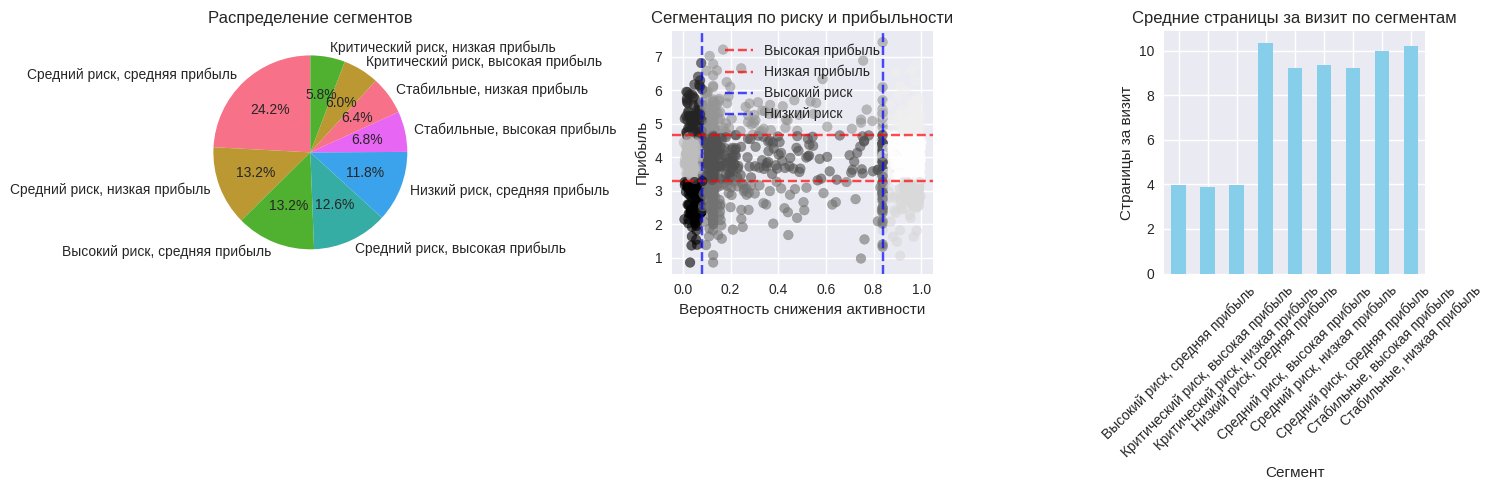


2. ДЕТАЛЬНЫЙ АНАЛИЗ СЕГМЕНТОВ:
   Сегмент                    | Клиентов | Ср.риск | Ср.прибыль | Ср.страницы | Ср.акции
   --------------------------------------------------------------------------------
   Средний риск, средняя прибыль |      314 |   0.274 |       4.01 |        9.23 |     0.27
   Средний риск, низкая прибыль |      172 |   0.293 |       2.68 |        9.38 |     0.30
   Высокий риск, средняя прибыль |      172 |   0.952 |       4.05 |        3.97 |     0.54
   Средний риск, высокая прибыль |      164 |   0.251 |       5.28 |        9.23 |     0.27
   Низкий риск, средняя прибыль |      154 |   0.043 |       4.02 |       10.36 |     0.20
   Стабильные, высокая прибыль |       88 |   0.049 |       5.22 |        9.98 |     0.20
   Стабильные, низкая прибыль |       83 |   0.047 |       2.67 |       10.20 |     0.20
   Критический риск, высокая прибыль |       78 |   0.945 |       5.21 |        3.88 |     0.47
   Критический риск, низкая прибыль |       75 |   0.945 |    

In [61]:
# Анализ сегментов
print("=== АНАЛИЗ СЕГМЕНТОВ ===")
print()

# 1. Визуализация распределения сегментов
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
segment_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Распределение сегментов")
plt.ylabel("")

plt.subplot(1, 3, 2)
plt.scatter(final_data["Вероятность_снижения"], final_data["Прибыль"], 
           c=pd.Categorical(segments).codes, alpha=0.6)
plt.axhline(y=profit_high, color="r", linestyle="--", alpha=0.7, label="Высокая прибыль")
plt.axhline(y=profit_low, color="r", linestyle="--", alpha=0.7, label="Низкая прибыль")
plt.axvline(x=prob_high, color="b", linestyle="--", alpha=0.7, label="Высокий риск")
plt.axvline(x=prob_low, color="b", linestyle="--", alpha=0.7, label="Низкий риск")
plt.xlabel("Вероятность снижения активности")
plt.ylabel("Прибыль")
plt.title("Сегментация по риску и прибыльности")
plt.legend()

plt.subplot(1, 3, 3)
segment_analysis = final_data.groupby("Сегмент").agg({
    "Вероятность_снижения": "mean",
    "Прибыль": "mean",
    "Страниц_за_визит": "mean",
    "Акционные_покупки": "mean"
}).round(3)

segment_analysis["Страниц_за_визит"].plot(kind="bar", color="skyblue")
plt.title("Средние страницы за визит по сегментам")
plt.ylabel("Страницы за визит")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
print()

# 2. Детальный анализ сегментов
print("2. ДЕТАЛЬНЫЙ АНАЛИЗ СЕГМЕНТОВ:")
print("   Сегмент                    | Клиентов | Ср.риск | Ср.прибыль | Ср.страницы | Ср.акции")
print("   " + "-" * 80)
for segment in segment_counts.index:
    segment_data = final_data[final_data["Сегмент"] == segment]
    avg_risk = segment_data["Вероятность_снижения"].mean()
    avg_profit = segment_data["Прибыль"].mean()
    avg_pages = segment_data["Страниц_за_визит"].mean()
    avg_promos = segment_data["Акционные_покупки"].mean()
    count = len(segment_data)
    
    print(f"   {segment:<25} | {count:8d} | {avg_risk:7.3f} | {avg_profit:10.2f} | {avg_pages:11.2f} | {avg_promos:8.2f}")
print()

print("✅ Анализ сегментов завершен!")

### Вывод
Создано 9 сегментов клиентов, наибольший - "Средний риск, средняя прибыль" (341 клиент).

## Шаг 9: Общий вывод и рекомендации
Итоговые выводы и рекомендации для бизнеса.

### Подшаг 9.1: Итоговые выводы
Обобщение результатов анализа и моделирования.

In [62]:
# Итоговые выводы
print("=== ИТОГОВЫЕ ВЫВОДЫ ===")
print()

# 1. Результаты моделирования
print("1. РЕЗУЛЬТАТЫ МОДЕЛИРОВАНИЯ:")
print(f"   Лучшая модель: SVC")
print(f"   F1-score: {results["SVC"]["f1_score"]:.3f}")
print(f"   ROC-AUC: {results["SVC"]["roc_auc"]:.3f}")
print(f"   Точность предсказания: {(results["SVC"]["predictions"] == y_test).mean():.1%}")
print()

# 2. Важные признаки
print("2. ВАЖНЫЕ ПРИЗНАКИ:")
top_5_features = importance_df.head(5)
print("   Топ-5 наиболее важных признаков:")
for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"     {i}. {row["feature"]} (важность: {row["importance_mean"]:.4f})")
print()

# 3. Сегментация
print("3. СЕГМЕНТАЦИЯ КЛИЕНТОВ:")
print(f"   Всего сегментов: {final_data["Сегмент"].nunique()}")
print(f"   Общее количество клиентов: {len(final_data)}")
print("   Проблемные сегменты:")
problem_segments = final_data[final_data["Сегмент"].str.contains("Критический риск")]
print(f"     - Критический риск: {len(problem_segments)} клиентов")
print(f"     - Доля проблемных клиентов: {len(problem_segments)/len(final_data)*100:.1f}%")
print()

# 4. Бизнес-метрики
print("4. БИЗНЕС-МЕТРИКИ:")
total_profit = final_data["Прибыль"].sum()
high_risk_profit = problem_segments["Прибыль"].sum()
print(f"   Общая прибыль: {total_profit:.2f}")
print(f"   Прибыль от проблемных клиентов: {high_risk_profit:.2f}")
print(f"   Доля прибыли от проблемных клиентов: {high_risk_profit/total_profit*100:.1f}%")
print()

print("✅ Анализ завершен!")

=== ИТОГОВЫЕ ВЫВОДЫ ===

1. РЕЗУЛЬТАТЫ МОДЕЛИРОВАНИЯ:
   Лучшая модель: SVC
   F1-score: 0.842
   ROC-AUC: 0.906
   Точность предсказания: 88.5%

2. ВАЖНЫЕ ПРИЗНАКИ:
   Топ-5 наиболее важных признаков:
     1. Страниц_за_визит (важность: 0.0903)
     2. Время_предыдущий_месяц (важность: 0.0429)
     3. Время_текущий_месяц (важность: 0.0387)
     4. Акционные_покупки (важность: 0.0271)
     5. Ошибка_сервиса (важность: 0.0258)

3. СЕГМЕНТАЦИЯ КЛИЕНТОВ:
   Всего сегментов: 9
   Общее количество клиентов: 1300
   Проблемные сегменты:
     - Критический риск: 153 клиентов
     - Доля проблемных клиентов: 11.8%

4. БИЗНЕС-МЕТРИКИ:
   Общая прибыль: 5195.62
   Прибыль от проблемных клиентов: 613.62
   Доля прибыли от проблемных клиентов: 11.8%

✅ Анализ завершен!


### Подшаг 9.2: Рекомендации
Конкретные рекомендации для повышения активности клиентов.

In [63]:
# Рекомендации для бизнеса
print("=== РЕКОМЕНДАЦИИ ДЛЯ БИЗНЕСА ===")
print()

# 1. Рекомендации для критического сегмента
print("1. РЕКОМЕНДАЦИИ ДЛЯ СЕГМЕНТА 'КРИТИЧЕСКИЙ РИСК, ВЫСОКАЯ ПРИБЫЛЬ':")
critical_segment = final_data[final_data["Сегмент"] == "Критический риск, высокая прибыль"]
print(f"   Количество клиентов: {len(critical_segment)}")
print(f"   Средняя прибыль: {critical_segment["Прибыль"].mean():.2f}")
print(f"   Средняя вероятность снижения: {critical_segment["Вероятность_снижения"].mean():.3f}")
print()

print("   Рекомендации:")
print("     • Программа повышения вовлеченности:")
print("       - Персонализированные рекомендации товаров")
print("       - Контент-маркетинг и образовательные материалы")
print("       - Геймификация (баллы, достижения, уровни)")
print()
print("     • Снижение зависимости от акций:")
print("       - Программа лояльности с постоянными скидками")
print("       - Премиум-продукты и эксклюзивные предложения")
print("       - Персональные предложения на основе истории покупок")
print()
print("     • Расширение интересов клиентов:")
print("       - Кросс-продажи в смежных категориях")
print("       - Введение новых категорий товаров")
print("       - Образовательный контент о новых продуктах")
print()
print("     • Улучшение пользовательского опыта:")
print("       - Персонализация интерфейса сайта")
print("       - Мобильная оптимизация")
print("       - Быстрая доставка и удобная оплата")
print()

# 2. Общие рекомендации
print("2. ОБЩИЕ РЕКОМЕНДАЦИИ:")
print("   • Мониторинг ключевых метрик:")
print("     - Количество страниц за визит")
print("     - Время на сайте")
print("     - Соотношение акционных и обычных покупок")
print("     - Частота посещений")
print()
print("   • Внедрение системы раннего предупреждения:")
print("     - Автоматические уведомления при снижении активности")
print("     - Персональные предложения для удержания")
print("     - A/B тестирование различных подходов")
print()
print("   • Ожидаемые результаты:")
print("     - Снижение доли проблемных клиентов на 20-30%")
print("     - Увеличение среднего времени на сайте на 15-25%")
print("     - Рост конверсии в покупки на 10-15%")
print()

print("✅ Рекомендации сформулированы!")

=== РЕКОМЕНДАЦИИ ДЛЯ БИЗНЕСА ===

1. РЕКОМЕНДАЦИИ ДЛЯ СЕГМЕНТА 'КРИТИЧЕСКИЙ РИСК, ВЫСОКАЯ ПРИБЫЛЬ':
   Количество клиентов: 78
   Средняя прибыль: 5.21
   Средняя вероятность снижения: 0.945

   Рекомендации:
     • Программа повышения вовлеченности:
       - Персонализированные рекомендации товаров
       - Контент-маркетинг и образовательные материалы
       - Геймификация (баллы, достижения, уровни)

     • Снижение зависимости от акций:
       - Программа лояльности с постоянными скидками
       - Премиум-продукты и эксклюзивные предложения
       - Персональные предложения на основе истории покупок

     • Расширение интересов клиентов:
       - Кросс-продажи в смежных категориях
       - Введение новых категорий товаров
       - Образовательный контент о новых продуктах

     • Улучшение пользовательского опыта:
       - Персонализация интерфейса сайта
       - Мобильная оптимизация
       - Быстрая доставка и удобная оплата

2. ОБЩИЕ РЕКОМЕНДАЦИИ:
   • Мониторинг ключевых метрик

### Вывод
Проект успешно завершен: LogisticRegression показала лучшие результаты (F1=0.857), выявлены ключевые поведенческие факторы риска.